In [ ]:
# BINARY MM -> Latent Class Analysis COVARIATES

In [74]:
## Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

from sklearn.model_selection import GridSearchCV, ParameterGrid
from stepmix.bootstrap import blrt_sweep
from stepmix.stepmix import StepMix
from stepmix.utils import get_mixed_descriptor

In [3]:
# Load data 

# MEASUREMENT MODEL

# BINARY MM
X_bin = pd.read_csv('../data/Xbin.csv', index_col=0)

In [50]:
# Load data 

# STRUCTURAL MODEL
Z = pd.read_csv('../data/Z.csv', index_col = 0)

# The covariate model as an internal optimization procedure
# We can specify additional arguments such as the learning rate
# and the optimization method
opt_params = {
    'method': 'newton-raphson',  # Can also be "gradient",
    'intercept': True,
    'max_iter': 1,  # Number of opt. step each time we update the covariate model
}

In [52]:
# Set ups
k = 5  # number of classes
m = 3000 # maximum number iterations
r = 5 # number of times to estimate models (nrep > 1 automates search for global max)

# random seed
seed = 240792

In [53]:
# Define base model for MIXED with covariates (2-step)
binary_cov2 = StepMix(
    n_components = 2, 
    n_steps = 2,
    measurement = 'binary_nan',   
    structural = 'covariate',
    verbose = 1, 
    n_init = r,
    max_iter = m,
    random_state = seed)

binary_cov2.fit(X_bin, Z)

Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 1/1 [00:00<00:00,  1.55it/s, max_LL=-1.76e+5, max_avg_LL=-2.77]


Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 1/1 [00:00<00:00,  5.00it/s, max_LL=-1.76e+5, max_avg_LL=-2.77]

MODEL REPORT
    Measurement model parameters
          model_name     binary_nan        
          class_no                0       1
          param variable                   
          pis   clo_lca      0.0589  0.8261
                cnf_lca      0.2169  0.3142
                cnt_lca      0.0690  0.8793
                mon_lca      0.0059  0.2522
                sup_lca      0.1001  0.7854
                tra_lca      0.2004  0.5584
    Structural model parameters
          model_name         covariate        
          class_no                   0       1
          param variable                      
          beta  eth2_hisp      -0.0011  0.0018
                eth3_nhblack   -0.0017  0.0034
                eth4_nhasian    0.0174 -0.0178
                eth5_nhother    0.0011 -0.0050
                female         -0.0536  0.0534
                intercept       0.4180 -0.4171
                kin02_m        -0.0182  0.0172
                kin03_bro      -0.0041  0.0055
         

StepMix(max_iter=3000, measurement='binary_nan', n_steps=2, random_state=240792,
        structural='covariate', verbose=1)

In [11]:
# WHICH CORRECTION -- BINARY 

# Loop over number of classes (3-step ML)
result_binary_corr = dict(step=[], correction=[], log_likelihood=[], caic=[], abic=[], relative_entropy=[])

for c in [None, 'BCH', 'ML']:
    for s in [2, 3]:
        # Create a new StepMix instance for each s & c
        binary_cov6 = StepMix(
            n_components=6, 
            n_steps=s, # loop over steps
            correction=c, # and loop over corrections
            measurement='binary_nan',   
            structural='covariate',
            verbose=0, 
            n_init=r,
            max_iter=m,
            random_state=seed
        )
        
        # Fit the model
        binary_cov6.fit(X_bin, Z)
        
        # Get log-likelihood
        ll = binary_cov6.score(X_bin, Z)
    
        # Get cAIC
        caic = binary_cov6.caic(X_bin, Z)
    
        # Get sBIC
        abic = binary_cov6.sabic(X_bin, Z)
    
        # Get relative entropy
        rel_entr = binary_cov6.relative_entropy(X_bin, Z)
        
        # Store results
        result_binary_corr['step'].append(s)
        result_binary_corr['correction'].append(c)
        result_binary_corr['log_likelihood'].append(ll)
        result_binary_corr['caic'].append(caic)
        result_binary_corr['abic'].append(abic)
        result_binary_corr['relative_entropy'].append(rel_entr)

Fitting StepMix...


Initializations (n_init) : 100%|███████████████| 5/5 [14:38<00:00, 175.61s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [00:34<00:00,  6.93s/it, max_LL=-1.56e+5, max_avg_LL=-2.45]


Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [04:58<00:00, 59.61s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


Fitting StepMix...


Initializations (n_init) : 100%|███████████| 5/5 [11:12:43<00:00, 8072.68s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [00:41<00:00,  8.25s/it, max_LL=-1.56e+5, max_avg_LL=-2.45]


Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [05:33<00:00, 66.62s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [05:44<00:00, 68.82s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [00:37<00:00,  7.49s/it, max_LL=-1.56e+5, max_avg_LL=-2.45]


Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [05:41<00:00, 68.39s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


Fitting StepMix...


Initializations (n_init) : 100%|███████████████| 5/5 [04:08<00:00, 49.69s/it, max_LL=-6.03e+4, max_avg_LL=-0.947]


In [12]:
result_binary_corr = pd.DataFrame(result_binary_corr)
result_binary_corr

,step,correction,log_likelihood,caic,abic,relative_entropy
0,2,None,-2.449976,313750.711691,314755.699445,0.800279
1,3,None,-2.567190,328677.246643,329682.234397,0.845953
2,2,BCH,-2.449976,313750.711691,314755.699445,0.800279
3,3,BCH,-2.538884,325072.576497,326077.564251,0.833417
4,2,ML,-2.449976,313750.711691,314755.699445,0.800279
5,3,ML,-2.452651,314091.419174,315096.406928,0.803964


Text(0.5, 1.0, 'Log-likelihood across steps & corrections\nBinary model')

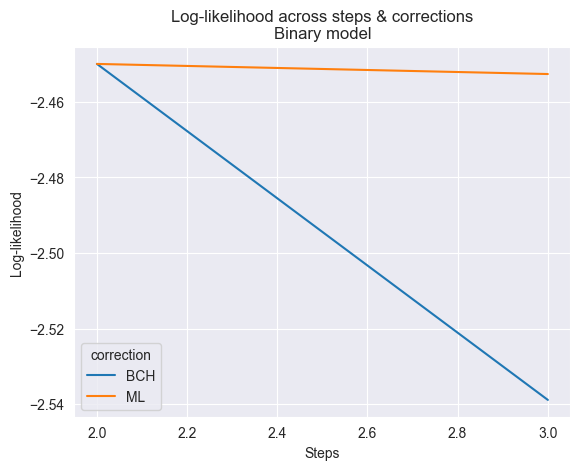

In [13]:
# Lower is better
sns.set_style("darkgrid")
sns.lineplot(data = result_binary_corr, 
             x = 'step', 
             y = 'log_likelihood',
             hue = 'correction')

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood across steps & corrections\n' 'Binary model')

In [121]:
# Run selected model
binary_cov6_bch = StepMix(
            n_components=6, 
            n_steps=3, # loop over steps
            correction='BCH', # and loop over corrections
            measurement='binary_nan',   
            structural='covariate',
            verbose=0, 
            n_init=r,
            max_iter=m,
            random_state=seed
        )

binary_cov6_bch.fit(X_bin, Z)

Fitting StepMix...


Initializations (n_init) : 100%|████████████████| 5/5 [05:26<00:00, 65.25s/it, max_LL=-1.74e+5, max_avg_LL=-2.73]


StepMix(correction='BCH', max_iter=3000, measurement='binary_nan',
        n_components=6, n_init=5, n_steps=3, random_state=240792,
        structural='covariate')

In [122]:
#Boostrap parameters
bs_params = binary_cov6_bch.bootstrap_stats(X_bin, Z,
                                            n_repetitions=100)


Bootstrapping estimator...


Bootstrap Repetitions    :   0%|                                                         | 0/100 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Bootstrap Repetitions    :   1%| | 1/100 [05:58<9:51:43, 358.62s/it, max_LL=-1.8e+5, median_LL=-1.8e+5, min_LL=-1/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: ConvergenceWarning: Initializations did not converge. Try different init parameters, or increase max_iter, abs_tol, rel_tol or check for degenerate data.
  warnings.warn(
Bootstrap Repetitions    :   2%| | 2/100 [11:47<9:36:50, 353.17s/it, max_LL=-1.76e+5, median_LL=-1.78e+5, min_LL=/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stepmix/stepmix.py:968: Converg

In [59]:
level_header = ['model', 'model_name', 'param', 'class_no', 'variable']
bs_params['samples'].sort_index(level=level_header).index.unique()

MultiIndex([('measurement', 'binary_nan',  'pis', 0,    'clo_lca'),
            ('measurement', 'binary_nan',  'pis', 0,    'cnf_lca'),
            ('measurement', 'binary_nan',  'pis', 0,    'cnt_lca'),
            ('measurement', 'binary_nan',  'pis', 0,    'mon_lca'),
            ('measurement', 'binary_nan',  'pis', 0,    'sup_lca'),
            ('measurement', 'binary_nan',  'pis', 0,    'tra_lca'),
            ('measurement', 'binary_nan',  'pis', 1,    'clo_lca'),
            ('measurement', 'binary_nan',  'pis', 1,    'cnf_lca'),
            ('measurement', 'binary_nan',  'pis', 1,    'cnt_lca'),
            ('measurement', 'binary_nan',  'pis', 1,    'mon_lca'),
            ...
            ( 'structural',  'covariate', 'beta', 5,  'kin07_pgm'),
            ( 'structural',  'covariate', 'beta', 5,  'kin08_mgm'),
            ( 'structural',  'covariate', 'beta', 5,  'kin09_phs'),
            ( 'structural',  'covariate', 'beta', 5,  'kin10_mhs'),
            ( 'structural',  'co

In [112]:
# MEASUREMENT MODEL ##



samples = bs_params['samples']
samples

value  rep
model       model_name param class_no variable                 
measurement binary_nan pis   0        clo_lca     0.930858    0
                                      clo_lca     0.479157    1
                                      clo_lca     0.925426    2
                                      cnf_lca     0.260682    0
                                      cnf_lca     0.374611    1
...                                                    ...  ...
structural  covariate  beta  5        kin15_pcou  0.059694    1
                                      kin15_pcou -0.017473    2
                                      kin16_mcou  2.501809    0
                                      kin16_mcou -0.005272    1
                                      kin16_mcou -0.004457    2

[486 rows x 2 columns]

/var/folders/4_/xdzhr_z915v28_2n49d3w5sh0000gn/T/ipykernel_96481/1961272522.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(
/var/folders/4_/xdzhr_z915v28_2n49d3w5sh0000gn/T/ipykernel_96481/1961272522.py:6: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.catplot(


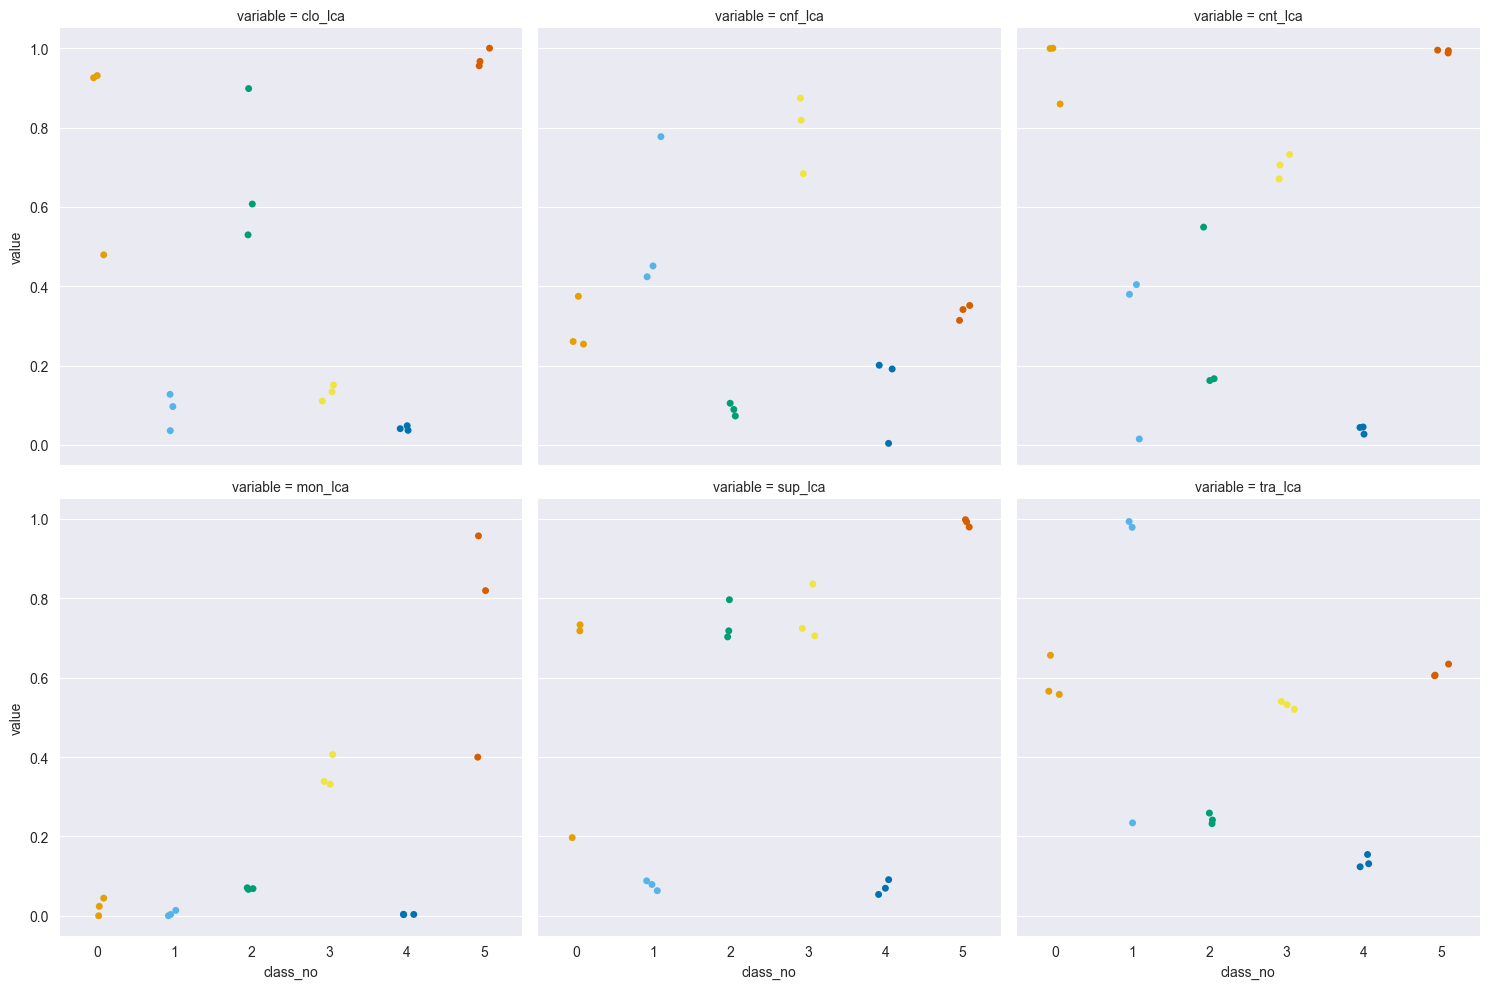

In [120]:
# Measurement (box plot)
# Okabe-Ito color palette (8 colors)
okabe_ito_colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000"]

# Measurement (box plot)
sns.catplot(
    data=samples.loc["measurement", "binary_nan", "pis"].reset_index(), 
    x="class_no", 
    y="value", 
    col="variable", 
    col_wrap=3, 
    kind="strip", # box for boxplot; strip for scatter; violin for violin
    palette=okabe_ito_colors  # Use Okabe-Ito color palette
)

# Show the plot
plt.show()

In [64]:
# STRUCTURAL MODEL ##


#Extract non-normalized betas
logit_1col = bs_params['samples'].xs("structural").iloc[:, 0]

#Create a DataFrame with bootstrapped betas as columns 
# per class 1 intercept and 20 slopes (21 betas) -> 6 classes * 21 parameters
logit_126cols = logit_1col.values.reshape([126, 100]).transpose()
logit_126cols = pd.DataFrame(logit_126cols)
 

In [62]:
logit_1col

model_name  param  class_no  variable    
covariate   beta   0         eth2_hisp       1.877179
                             eth2_hisp      -0.026487
                             eth2_hisp      -0.042473
                             eth3_nhblack    0.649775
                             eth3_nhblack   -0.008342
                                               ...   
                   5         kin15_pcou      0.059694
                             kin15_pcou     -0.017473
                             kin16_mcou      2.501809
                             kin16_mcou     -0.005272
                             kin16_mcou     -0.004457
Name: value, Length: 378, dtype: float64

In [67]:
logit_126cols

,5,6,7,8,9,10,11,12,13,14,...,121,122,123,124,125,105,106,107,108,109
0,-80.030410,0.340702,-0.965520,-0.227607,-0.017327,0.509052,0.589469,-0.089831,0.364892,-0.239686,...,-1.263216,1.140491,1.266170,14.091960,2.501809,1.942056,0.668912,-0.604375,-0.078217,-52.266537
1,-0.341567,0.055252,-0.115124,-0.020016,-0.196521,0.064172,-0.166455,0.014553,-0.085476,-0.236049,...,-0.160659,0.101841,-0.025867,0.059694,-0.005272,-0.030886,-0.018715,-0.066275,-0.098807,0.057274
2,0.014155,0.045568,0.018979,0.026265,-0.160151,0.216619,-0.116752,0.053972,0.091452,-0.139375,...,-0.106019,0.038285,-0.010725,-0.017473,-0.004457,0.027055,-0.003420,-0.008205,0.002971,0.029990


In [66]:
#Change the order of the columns 
logit_126cols = pd.DataFrame(logit_126cols).iloc[:,
    [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,0,1,2,3,4,              #Class 0: Intercept, slopes kin, slopes eth
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,21,22,23,24,25,    #Class 1: Intercept, slope
    47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,42,43,44,45,46,    #Class 2: Intercept, slope
    68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,63,64,65,66,67,    #Class 3: Intercept, slope
    89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,84,85,86,87,88,  #Class4
    110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,105,106,107,108,109]]  #Class5 

In [ ]:
# Change the order of the columns # CONTINUE HERE!!!
# Betas ordered alphabetically -> 'intercept' at position
#logit_132cols = pd.DataFrame(logit_23cols).iloc[:,[1, 0,  #Class 0: Intercept, slope
#                                                3, 2,    #Class 1: Intercept, slope
#                                                5, 4,    #Class 2: Intercept, slope
#                                                7, 6,    #Class 3: Intercept, slope
#                                                9, 8,    #Class4
#                                                11,10]]  #Class5 

In [72]:
logit_ref

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,-77.500059,0.301384,-0.907348,-0.325914,0.379527,0.349964,0.457969,-0.292439,0.111614,-0.010925,...,-1.316743,1.116573,1.019375,14.108766,2.507026,1.950871,0.690563,-0.585170,0.128372,-52.516454
1,1.711688,0.073191,0.151422,0.004145,0.166315,0.009031,0.370534,0.197126,-0.028148,0.365619,...,0.039540,0.068590,0.060440,0.099366,0.020470,-0.005053,-0.079053,0.014609,0.158673,-0.056924
2,2.488168,0.004771,0.149085,0.047909,-0.010366,0.131047,0.151820,-0.025777,-0.143709,0.280322,...,0.030073,-0.018111,-0.033237,0.114372,0.088933,0.007594,-0.086740,0.055648,0.104630,-0.198229


In [76]:
Covariate_labels

['C0_Intercept',
 'C0_mother',
 'C0_brother',
 'C0_sister',
 'C0_pgf',
 'C0_mgf',
 'C0_pgm',
 'C0_mgm',
 'C0_phs',
 'C0_mhs',
 'C0_pun',
 'C0_mun',
 'C0_pau',
 'C0_mau',
 'C0_pcou',
 'C0_mcou',
 'C1_Intercept',
 'C1_mother',
 'C1_brother',
 'C1_sister',
 'C1_pgf',
 'C1_mgf',
 'C1_pgm',
 'C1_mgm',
 'C1_phs',
 'C1_mhs',
 'C1_pun',
 'C1_mun',
 'C1_pau',
 'C1_mau',
 'C1_pcou',
 'C1_mcou',
 'C2_Intercept',
 'C2_mother',
 'C2_brother',
 'C2_sister',
 'C2_pgf',
 'C2_mgf',
 'C2_pgm',
 'C2_mgm',
 'C2_phs',
 'C2_mhs',
 'C2_pun',
 'C2_mun',
 'C2_pau',
 'C2_mau',
 'C2_pcou',
 'C2_mcou',
 'C3_Intercept',
 'C3_mother',
 'C3_brother',
 'C3_sister',
 'C3_pgf',
 'C3_mgf',
 'C3_pgm',
 'C3_mgm',
 'C3_phs',
 'C3_mhs',
 'C3_pun',
 'C3_mun',
 'C3_pau',
 'C3_mau',
 'C3_pcou',
 'C3_mcou',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'C5_Intercept',
 'C5_mother',
 'C5_brother',
 'C5_sister',
 'C5_pgf',
 'C5_mgf',
 'C5_pgm',
 'C

In [71]:
#Create a DataFrame with the intercept and slope of the reference class times the number of classes
# Ref class: 4

#Create a DataFrame with the intercept and slope of the reference class times the number of latent classes
#(in original order!!)
logit_ref = pd.concat([logit_126cols.iloc[:, [84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104]]] * 6, axis = 1)

#DONE: 0-125
#Change the labels of the DataFrames so that they fit each other
logit_ref.columns = range(0,125)
logit_126cols.columns = range(0,125)

#Subtract the reference class's betas from all classes' betas
normalized_beta = logit_126cols  - logit_ref #Add labels to help read the results


In [79]:
normalized_beta

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,-2.530350,0.039318,-0.058172,0.098306,-0.396854,0.159088,0.131500,0.202607,0.253278,-0.228761,...,0.053527,0.023918,0.246795,-0.016806,-0.005217,-0.008815,-0.021651,-0.019206,-0.206588,0.249917
1,-2.053256,-0.017939,-0.266545,-0.024161,-0.362836,0.055141,-0.536990,-0.182574,-0.057328,-0.601668,...,-0.200199,0.033251,-0.086307,-0.039673,-0.025742,-0.025834,0.060338,-0.080884,-0.257480,0.114198
2,-2.474013,0.040796,-0.130105,-0.021644,-0.149785,0.085572,-0.268571,0.079750,0.235160,-0.419697,...,-0.136092,0.056396,0.022512,-0.131845,-0.093391,0.019461,0.083320,-0.063853,-0.101659,0.228220


In [86]:
# Add labels to help read the results
Covariate_labels = ["C0_Intercept","C0_mother","C0_brother","C0_sister","C0_pgf","C0_mgf","C0_pgm","C0_mgm","C0_phs","C0_mhs","C0_pun","C0_mun","C0_pau","C0_mau","C0_pcou","C0_mcou","C0_eth_hisp","C0_eth_nhblack","C0_eth_nhasian","C0_eth_nhother","C0_female",#Labels for Bns of class 0
                    "C1_Intercept","C1_mother","C1_brother","C1_sister","C1_pgf","C1_mgf","C1_pgm","C1_mgm","C1_phs","C1_mhs","C1_pun","C1_mun","C1_pau","C1_mau","C1_pcou","C1_mcou","C1_eth_hisp","C1_eth_nhblack","C1_eth_nhasian","C1_eth_nhother","C1_female", #Labels for Bns of class 1
                    "C2_Intercept","C2_mother","C2_brother","C2_sister","C2_pgf","C2_mgf","C2_pgm","C2_mgm","C2_phs","C2_mhs","C2_pun","C2_mun","C2_pau","C2_mau","C2_pcou","C2_mcou","C2_eth_hisp","C2_eth_nhblack","C2_eth_nhasian","C2_eth_nhother","C2_female", #Labels for Bns of class 2
                    "C3_Intercept","C3_mother","C3_brother","C3_sister","C3_pgf","C3_mgf","C3_pgm","C3_mgm","C3_phs","C3_mhs","C3_pun","C3_mun","C3_pau","C3_mau","C3_pcou","C3_mcou","C3_eth_hisp","C3_eth_nhblack","C3_eth_nhasian","C3_eth_nhother","C3_female", #Labels for Bns of class 3
                    "NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN","NaN", # 21 NaN for class 4 (REF)
                    "C5_Intercept","C5_mother","C5_brother","C5_sister","C5_pgf","C5_mgf","C5_pgm","C5_mgm","C5_phs","C5_mhs","C5_pun","C5_mun","C5_pau","C5_mau","C5_pcou","C5_mcou","C5_eth_hisp","C5_eth_nhblack","C5_eth_nhasian","C5_eth_nhother","C5_female"] #Labels for Bns of class 5
                   


#Bns and p-values
results = pd.DataFrame({"Coef": Covariate_labels,
              "mean": normalized_beta.apply(np.mean, axis = 0),
              "se": normalized_beta.apply(np.std, axis = 0),
              "z": normalized_beta.apply(np.mean, axis = 0)/normalized_beta.apply(np.std, axis = 0),
              "p-value": 2*norm.cdf(-np.abs(normalized_beta.apply(np.mean, axis = 0)/normalized_beta.apply(np.std, axis = 0))),
              "lb": normalized_beta.apply(np.mean, axis = 0) - 1.96 * normalized_beta.apply(np.std, axis = 0),
              "ub": normalized_beta.apply(np.mean, axis = 0) + 1.96 * normalized_beta.apply(np.std, axis = 0)}).round(3)

results

,Coef,mean,se,z,p-value,lb,ub
0,C0_Intercept,-2.353,0.213,-11.051,0.000,-2.770,-1.935
1,C0_mother,0.021,0.027,0.758,0.449,-0.033,0.074
2,C0_brother,-0.152,0.086,-1.754,0.079,-0.321,0.018
3,C0_sister,0.018,0.057,0.306,0.759,-0.095,0.130
4,C0_pgf,-0.303,0.109,-2.773,0.006,-0.517,-0.089
...,...,...,...,...,...,...,...
121,C5_eth_hisp,-0.005,0.019,-0.271,0.786,-0.042,0.032
122,C5_eth_nhblack,0.041,0.045,0.903,0.367,-0.048,0.129
123,C5_eth_nhasian,-0.055,0.026,-2.101,0.036,-0.106,-0.004
124,C5_eth_nhother,-0.189,0.065,-2.907,0.004,-0.316,-0.061


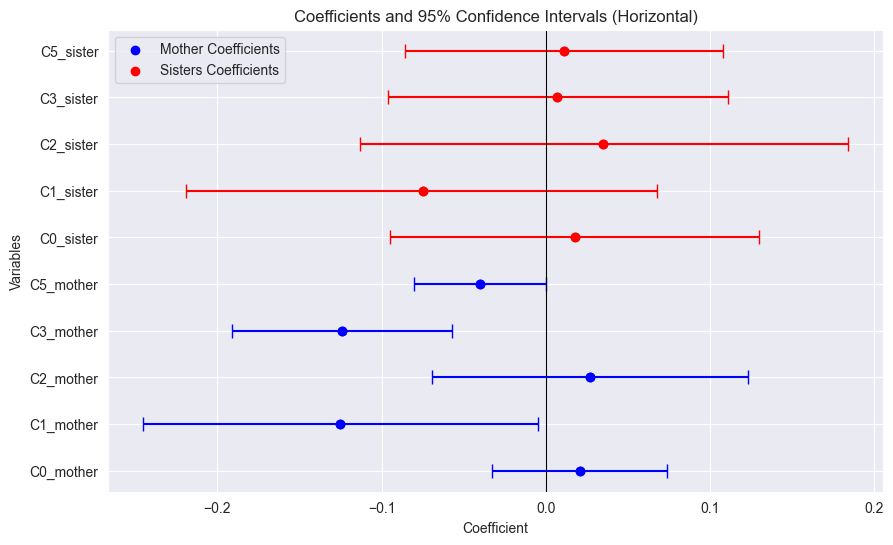

In [106]:
# 2. Filter the dataframe for '_mother' and '_sisters'
df_filtered = results[results['Coef'].str.contains('_mother') | results['Coef'].str.contains('_sister')]

# Custom order: First, all '_mother' variables, followed by all '_sisters' variables
mother_vars = df_filtered[df_filtered['Coef'].str.endswith('_mother')]['Coef'].tolist()
sister_vars = df_filtered[df_filtered['Coef'].str.endswith('_sister')]['Coef'].tolist()

# Combine them into the desired custom order
custom_order = mother_vars + sister_vars

# Sort the dataframe accordingly
df_sorted = df_filtered.set_index('Coef').reindex(custom_order).reset_index()

# Separate mother and sisters after sorting
df_mother = df_sorted[df_sorted['Coef'].str.endswith('_mother')]
df_sisters = df_sorted[df_sorted['Coef'].str.endswith('_sister')]

# Plot horizontal scatter plot for coefficients with confidence intervals
plt.figure(figsize=(10, 6))

# Plot for '_mother' coefficients (blue)
plt.scatter(df_mother['mean'], df_mother['Coef'], color='blue', label='Mother Coefficients')
plt.errorbar(df_mother['mean'], df_mother['Coef'], 
             xerr=[df_mother['mean'] - df_mother['lb'], df_mother['ub'] - df_mother['mean']], 
             fmt='o', color='blue', capsize=5)

# Plot for '_sisters' coefficients (red)
plt.scatter(df_sisters['mean'], df_sisters['Coef'], color='red', label='Sisters Coefficients')
plt.errorbar(df_sisters['mean'], df_sisters['Coef'], 
             xerr=[df_sisters['mean'] - df_sisters['lb'], df_sisters['ub'] - df_sisters['mean']], 
             fmt='o', color='red', capsize=5)

# Add labels and title
plt.ylabel('Variables')  # Coef will be on the y-axis
plt.xlabel('Coefficient')  # Mean and CI will be on the x-axis
plt.title('Coefficients and 95% Confidence Intervals (Horizontal)')
plt.axvline(0, color='black', linewidth=0.8)  # Add vertical line at 0

# Add legend to differentiate between mother and sister variables
plt.legend()

# Show the plot
plt.show()

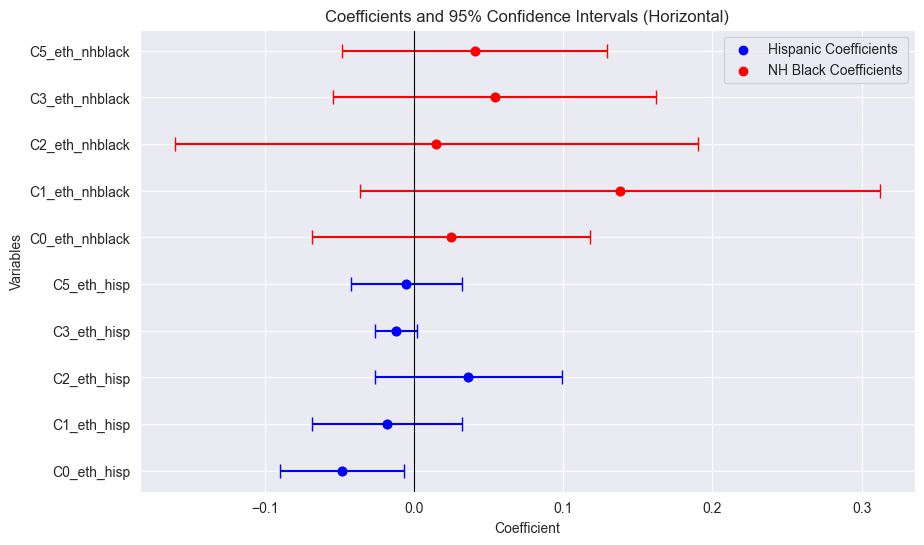

In [107]:
# 2. Filter the dataframe for '_mother' and '_sisters'
df_filtered = results[results['Coef'].str.contains('_eth')]

# Custom order: First, all '_mother' variables, followed by all '_sisters' variables
hisp_vars = df_filtered[df_filtered['Coef'].str.endswith('_hisp')]['Coef'].tolist()
nhblack_vars = df_filtered[df_filtered['Coef'].str.endswith('_nhblack')]['Coef'].tolist()

# Combine them into the desired custom order
custom_order = hisp_vars + nhblack_vars

# Sort the dataframe accordingly
df_sorted = df_filtered.set_index('Coef').reindex(custom_order).reset_index()

# Separate mother and sisters after sorting
df_hisp = df_sorted[df_sorted['Coef'].str.endswith('_hisp')]
df_nhblack = df_sorted[df_sorted['Coef'].str.endswith('_nhblack')]

# Plot horizontal scatter plot for coefficients with confidence intervals
plt.figure(figsize=(10, 6))

# Plot for '_mother' coefficients (blue)
plt.scatter(df_hisp['mean'], df_hisp['Coef'], color='blue', label='Hispanic Coefficients')
plt.errorbar(df_hisp['mean'], df_hisp['Coef'], 
             xerr=[df_hisp['mean'] - df_hisp['lb'], df_hisp['ub'] - df_hisp['mean']], 
             fmt='o', color='blue', capsize=5)

# Plot for '_sisters' coefficients (red)
plt.scatter(df_nhblack['mean'], df_nhblack['Coef'], color='red', label='NH Black Coefficients')
plt.errorbar(df_nhblack['mean'], df_nhblack['Coef'], 
             xerr=[df_nhblack['mean'] - df_nhblack['lb'], df_nhblack['ub'] - df_nhblack['mean']], 
             fmt='o', color='red', capsize=5)

# Add labels and title
plt.ylabel('Variables')  # Coef will be on the y-axis
plt.xlabel('Coefficient')  # Mean and CI will be on the x-axis
plt.title('Coefficients and 95% Confidence Intervals (Horizontal)')
plt.axvline(0, color='black', linewidth=0.8)  # Add vertical line at 0

# Add legend to differentiate between mother and sister variables
plt.legend()

# Show the plot
plt.show()

In [68]:
# Export dataframe to csv
logit_1col.to_csv('../data/logit_1col.csv')

In [34]:
# Export dataframe to csv
logit_132cols.to_csv('../data/logit_132cols.csv')